In [1]:
import os
import joblib
import pandas as pd
import re
import numpy as np
import sys
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
from sklearn.metrics import classification_report

In [2]:
# Chemin vers le répertoire contenant les fichiers CSV
chemin_dossier = r'C:\Users\infoMix\Desktop\PFE\Deutchh'

# Liste pour stocker les DataFrames chargés à partir des fichiers CSV
dataframes = []

# Parcourir les fichiers dans le répertoire
for fichier in os.listdir(chemin_dossier):
    if fichier.endswith('.csv'):  # Assurez-vous que le fichier est un CSV
        chemin_fichier = os.path.join(chemin_dossier, fichier)
        df = pd.read_csv(chemin_fichier)
        dataframes.append(df)

# Concaténer tous les DataFrames en un seul
df = pd.concat(dataframes, ignore_index=True)

C:\Users\infoMix\AppData\Local\Temp\ipykernel_15844\949731741.py:11: DtypeWarning: Columns (1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_fichier)


In [3]:
# Obtention et affichage des catégories uniques regroupées
categories_uniques = df['category'].unique()
print("Catégories uniques regroupées:")
for category in categories_uniques:
    print(category)

Catégories uniques regroupées:
["Babymilch"]
["Shampoo"]
["Kinderpullover & -shirts"]
["Haarbürsten & Kämme"]
["Rasierklingen"]
["Kinder Outdoor- & Regenbekleidung"]
["Schnelle Gerichte"]
["Nagellack"]
["Geschenksets"]
["Beautyhelfer"]
["Bodylotion & Hautcreme"]
["Make-up & Foundation"]
["Künstliche Wimpern"]
["Körperpflege","Anti Aging","Gesicht"]
["Schnuller"]
["Kondome"]
["Topcoat & Basecoat"]
["Babyshampoo, Badezusätze & Co."]
["Babyöl & Babycreme"]
["Handcreme & Handmasken"]
["Kinderhandschuhe, -mützen & -schals"]
["Wundpflaster"]
["Babypflege","Feuchttücher & Co."]
["Wimpernzangen"]
["Insektizide & Dünger"]
["Protein Shakes & Pulver","Protein Shakes & Pulver"]
["Kekse, Waffeln & Cookies"]
["Immunsystem stärken","Zink"]
["Contouring"]
["Babygläschen & Co."]
["Knabberzeug"]
["Haushaltsartikel","Desinfektionssprays & Desinfektionstücher"]
["Sofortbildkameras & Zubehör"]
["Eyeliner & Kajal"]
["Kinderprodukte"]
["Schmuck"]
["Damen Parfum"]
["Monatslinsen"]
["Lufterfrischer & Raumduft"

In [4]:
df.head(15)

,created_at,description,images,sub_category,sub_sub_category,category,productTitle,_id
0,"May 2, 2023 @ 17:35:46.000",Für Babys von Geburt an: Diese Nestlé BEBA Anf...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Babymilch""]",Anfangsmilch Supreme Pre trinkfertig von Gebur...,KtGI3YcBzzd0Hs-L2Zeb
1,"May 2, 2023 @ 17:35:45.000",Die wohltuende Rezeptur mit Bio-Extrakten aus ...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Shampoo""]",Shampoo Anti-Schuppen,KNGI3YcBzzd0Hs-L2Zeb
2,"May 2, 2023 @ 17:35:45.000","Stell dir vor, aus klimaneutral wird jetzt sog...","[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Kinderpullover & -shirts""]","Kinder Shirt Pro Climate, Gr. 104, aus Bio-Bau...",KdGI3YcBzzd0Hs-L2Zeb
3,"May 2, 2023 @ 17:35:44.000",Durch ihre antistatischen Kunststoffborsten ei...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Haarbürsten & Kämme""]",Rundbürste mit Kunststoffborsten,J9GI3YcBzzd0Hs-L2Zeb
4,"May 2, 2023 @ 17:35:43.000",Die Gilette Venus Deluxe Smooth Sensitive Rasi...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Rasierklingen""]","Rasiererklingen, Deluxe Smooth Sensitive Rosegold",JdGI3YcBzzd0Hs-L2Zeb
5,"May 2, 2023 @ 17:35:43.000",Alle Regenbekleidung von mikk-line wird recyce...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Kinder Outdoor- & Regenbekleidung""]","Kinder Regenjacke, Gr. 110/116, blaugrün gemus...",JtGI3YcBzzd0Hs-L2Zeb
6,"May 2, 2023 @ 17:35:42.000",Das ökologisch erzeugte Fleisch der ECOLAND Sa...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Schnelle Gerichte""]",Salami Snack,I9GI3YcBzzd0Hs-L2Zeb
7,"May 2, 2023 @ 17:35:42.000",Der ARTDECO Art Couture Nagellack in der Mini ...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Nagellack""]",Nagellack Art Couture Mini Edition 1705 Berry,JNGI3YcBzzd0Hs-L2Zeb
8,"May 2, 2023 @ 17:35:41.000",Das GP Ostern 2023 Hydrator Serum Set von Sant...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Geschenksets""]",Geschenkset Dein Bio Super Hydrator 2tlg,ItGI3YcBzzd0Hs-L2Zeb
9,"May 2, 2023 @ 17:35:40.000",Die ebelin Professional Keratin-Pflegebürste p...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Haarbürsten & Kämme""]",Professional Keratin-Pflegebürste oval,IdGI3YcBzzd0Hs-LxZeC


In [5]:

nb_nan_category = df['category'].isna().sum()
nb_nan_sub_category = df['sub_category'].isna().sum()
nb_nan_sub_sub_category = df['sub_sub_category'].isna().sum()
nb_id= df['_id'].isna().sum()
nb_images = df['images'].isna().sum()
# Afficher le nombre de valeurs NaN dans chaque colonne
print("Nombre de valeurs NaN dans la colonne 'category':", nb_nan_category)
print("Nombre de valeurs NaN dans la colonne 'sub_category':", nb_nan_sub_category)
print("Nombre de valeurs NaN dans la colonne 'sub_sub_category':", nb_nan_sub_sub_category)
print("Nombre de valeurs NaN dans la colonne '_id':", nb_id)
print("Nombre de valeurs NaN dans la colonne 'images':", nb_images)

Nombre de valeurs NaN dans la colonne 'category': 133477
Nombre de valeurs NaN dans la colonne 'sub_category': 149354
Nombre de valeurs NaN dans la colonne 'sub_sub_category': 160263
Nombre de valeurs NaN dans la colonne '_id': 0
Nombre de valeurs NaN dans la colonne 'images': 0


In [6]:
# Convertissez les colonnes 'description' et 'category' en chaînes de caractères
df['description'] = df['description'].astype(str)
df['category'] = df['category'].astype(str)

In [7]:
df.shape


(174428, 8)

In [8]:
df.head(15)

,created_at,description,images,sub_category,sub_sub_category,category,productTitle,_id
0,"May 2, 2023 @ 17:35:46.000",Für Babys von Geburt an: Diese Nestlé BEBA Anf...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Babymilch""]",Anfangsmilch Supreme Pre trinkfertig von Gebur...,KtGI3YcBzzd0Hs-L2Zeb
1,"May 2, 2023 @ 17:35:45.000",Die wohltuende Rezeptur mit Bio-Extrakten aus ...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Shampoo""]",Shampoo Anti-Schuppen,KNGI3YcBzzd0Hs-L2Zeb
2,"May 2, 2023 @ 17:35:45.000","Stell dir vor, aus klimaneutral wird jetzt sog...","[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Kinderpullover & -shirts""]","Kinder Shirt Pro Climate, Gr. 104, aus Bio-Bau...",KdGI3YcBzzd0Hs-L2Zeb
3,"May 2, 2023 @ 17:35:44.000",Durch ihre antistatischen Kunststoffborsten ei...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Haarbürsten & Kämme""]",Rundbürste mit Kunststoffborsten,J9GI3YcBzzd0Hs-L2Zeb
4,"May 2, 2023 @ 17:35:43.000",Die Gilette Venus Deluxe Smooth Sensitive Rasi...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Rasierklingen""]","Rasiererklingen, Deluxe Smooth Sensitive Rosegold",JdGI3YcBzzd0Hs-L2Zeb
5,"May 2, 2023 @ 17:35:43.000",Alle Regenbekleidung von mikk-line wird recyce...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Kinder Outdoor- & Regenbekleidung""]","Kinder Regenjacke, Gr. 110/116, blaugrün gemus...",JtGI3YcBzzd0Hs-L2Zeb
6,"May 2, 2023 @ 17:35:42.000",Das ökologisch erzeugte Fleisch der ECOLAND Sa...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Schnelle Gerichte""]",Salami Snack,I9GI3YcBzzd0Hs-L2Zeb
7,"May 2, 2023 @ 17:35:42.000",Der ARTDECO Art Couture Nagellack in der Mini ...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Nagellack""]",Nagellack Art Couture Mini Edition 1705 Berry,JNGI3YcBzzd0Hs-L2Zeb
8,"May 2, 2023 @ 17:35:41.000",Das GP Ostern 2023 Hydrator Serum Set von Sant...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Geschenksets""]",Geschenkset Dein Bio Super Hydrator 2tlg,ItGI3YcBzzd0Hs-L2Zeb
9,"May 2, 2023 @ 17:35:40.000",Die ebelin Professional Keratin-Pflegebürste p...,"[""https://media.dm-static.com/images/q_auto,f_...",NaN,NaN,"[""Haarbürsten & Kämme""]",Professional Keratin-Pflegebürste oval,IdGI3YcBzzd0Hs-LxZeC


### Pretraitement des donnes 

In [9]:
def preprocess_text(text):
    # Suppression des caractères spéciaux
    text = re.sub(r"[^a-zA-ZÀ-ÿ0-9\s]", "", text)
    
    # Suppression des espaces après la suppression des caractères spéciaux
    text = text.strip()
    
    # Suppression de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Suppression des chiffres
    text = re.sub(r"\d", "", text)
    text = text.replace('&', '')
    # Convertir le texte en minuscules
    text = text.lower()
    # Remplacer les doubles espaces par un seul espace
    text = re.sub(r'\s+', ' ', text)
  
  
    return text

In [10]:

df["description"] = df["description"].apply(preprocess_text)
df["category"] = df["category"].apply(preprocess_text)

## Regroupement des category 

In [11]:
# Obtention et affichage des catégories uniques regroupées
categories_uniques = df['category'].unique()
print("Catégories uniques :")
for category in categories_uniques:
    print(category)

Catégories uniques :
babymilch
shampoo
kinderpullover shirts
haarbürsten kämme
rasierklingen
kinder outdoor regenbekleidung
schnelle gerichte
nagellack
geschenksets
beautyhelfer
bodylotion hautcreme
makeup foundation
künstliche wimpern
körperpflegeanti aginggesicht
schnuller
kondome
topcoat basecoat
babyshampoo badezusätze co
babyöl babycreme
handcreme handmasken
kinderhandschuhe mützen schals
wundpflaster
babypflegefeuchttücher co
wimpernzangen
insektizide dünger
protein shakes pulverprotein shakes pulver
kekse waffeln cookies
immunsystem stärkenzink
contouring
babygläschen co
knabberzeug
haushaltsartikeldesinfektionssprays desinfektionstücher
sofortbildkameras zubehör
eyeliner kajal
kinderprodukte
schmuck
damen parfum
monatslinsen
lufterfrischer raumduft
dauerhafte haarfarben
damenbinden
topcoat basecoatnagelpflege
leckerlis für hunde
sonnenschutz
baby bodies strampler
feuchttücher co
babyflaschen kinderflaschen
gesichtsreinigung
lipbalm lippenöle
immunsystem stärken
shampooprofessio

In [12]:
# Définition de la liste des mots clés
mots_cles = ['pflege', 'makeup', 'körper', 'düfte', 'haare', 'gesicht', 'gesundheit',
             'lebensmittel', 'baby spielzeug', 'home lifestyle', 'parfum',
             'apotheke gesundheit', 'haushalt']

# Modification de la colonne 'category' avec le regroupement
df['category'] = df['category'].apply(lambda x: next((mot for mot in mots_cles if mot in x), 'autre'))

# Affichage des catégories uniques regroupées
categories_uniques = df['category'].unique()
print("Catégories uniques regroupées:")
print(categories_uniques)

Catégories uniques regroupées:
['autre' 'makeup' 'pflege' 'haushalt' 'parfum' 'gesicht' 'haare' 'düfte'
 'gesundheit' 'körper' 'home lifestyle' 'lebensmittel' 'baby spielzeug']


In [13]:
# Calcul et affichage du nombre d'occurrences de chaque catégorie unique
nb_occurrences = df['category'].value_counts()
print("Nombre d'occurrences de chaque catégorie:")
print(nb_occurrences)

Nombre d'occurrences de chaque catégorie:
autre             150082
makeup              5588
pflege              5527
gesicht             4324
parfum              2554
körper              1812
haare               1014
home lifestyle       824
düfte                769
haushalt             646
baby spielzeug       503
gesundheit           402
lebensmittel         383
Name: category, dtype: int64


# Modelisation

 ## 1-SVM

In [10]:
import os
import joblib
import pandas as pd
import re
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
from sklearn.metrics import classification_report

In [11]:
def train_linear_svc_model(df):
    df['category'] = df['category'].fillna('')
    df['description'] = df['description'].fillna('')
    # Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement, 20% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(df['description'], df['category'], test_size=0.2, random_state=42)
    
    X_train = X_train.apply(preprocess_text)
    X_test = X_test.apply(preprocess_text)
    
    # Créer une instance de Tf-idfVectorizer ou CountVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    count_vectorizer = CountVectorizer()
    
    # Appliquer la vectorisation aux données d'entraînement et de test
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    X_train_count = count_vectorizer.fit_transform(X_train)
    X_test_count = count_vectorizer.transform(X_test)
    
    # Définir une pipeline avec une vectorisation Tfidf et un classificateur LinearSVC
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LinearSVC())
    ])
    
    # Définir les paramètres à tester pour le classificateur LinearSVC
    parameters = {
        'clf__C': [0.1, 1, 10],
        'clf__max_iter': [100, 500, 1000]
    }
    
    # Cross validation
    # Utiliser la validation croisée pour trouver les meilleurs paramètres
    grid_search = GridSearchCV(pipeline, parameters, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Afficher les meilleurs paramètres et le score obtenu sur l'ensemble de validation
    print("Meilleurs paramètres : ")
    print(grid_search.best_params_)
    print("Score sur l'ensemble de validation : ")
    print(grid_search.best_score_)
    
    # Créer une instance du classificateur SVM à noyau linéaire avec les meilleurs paramètres trouvés
    best_clf = LinearSVC(C=grid_search.best_params_['clf__C'], max_iter=grid_search.best_params_['clf__max_iter'], class_weight='balanced')
    # Entraîner le modèle sur l'ensemble d'entraînement
    best_clf.fit(X_train_tfidf, y_train)
    
    # Prédire les labels sur l'ensemble de test
    predictions_SVM = best_clf.predict(X_test_tfidf)
    
    return best_clf, X_test_tfidf, y_test

In [12]:
def evaluate_and_save_model(best_clf, X_test_tfidf, y_test, model_path):
    # Faire des prédictions sur l'ensemble de test
    y_pred = best_clf.predict(X_test_tfidf)

    # Calculer la précision
    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision:", precision)

    # Calculer le score F1
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Score F1 sur l'ensemble de test:", f1)
    sys.stdout.flush()
    # Calculer l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)
    
     # Générer le rapport de classification
    print("Rapport de classification : ")
    print(classification_report(y_test, y_pred))
    
    # Enregistrer le modèle
    joblib.dump(best_clf, model_path)

In [13]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matrice de confusion')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    # Affichage des valeurs dans la matrice de confusion
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.show()

C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn

C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `

Meilleurs paramètres : 
{'clf__C': 1, 'clf__max_iter': 100}
Score sur l'ensemble de validation : 
0.9537056961260998


C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\infoMix\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Precision: 0.9552061034769201
Score F1 sur l'ensemble de test: 0.9505779317209286
Accuracy sur l'ensemble de test: 0.9479733990712607
Rapport de classification : 
                precision    recall  f1-score   support

         autre       0.99      0.97      0.98     30028
baby spielzeug       0.71      0.92      0.80       106
         düfte       0.84      0.83      0.84       156
       gesicht       0.72      0.86      0.78       811
    gesundheit       0.50      0.78      0.61        72
         haare       0.54      0.77      0.63       192
      haushalt       0.68      0.92      0.78       123
home lifestyle       0.91      0.98      0.94       145
        körper       0.66      0.69      0.67       390
  lebensmittel       0.68      0.98      0.80        82
        makeup       0.76      0.90      0.82      1105
        parfum       0.77      0.91      0.84       535
        pflege       0.69      0.76      0.72      1141

      accuracy                           0.95     3

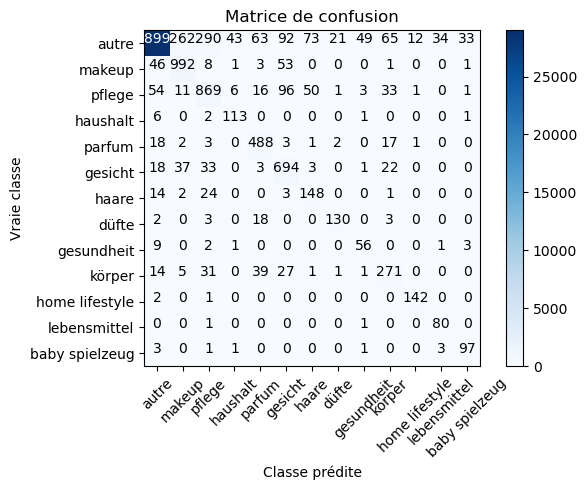

In [14]:
# Entraîner le modèle en utilisant la fonction train_linear_svc_model
best_clf, X_test_tfidf, y_test = train_linear_svc_model(df)
    
    # Évaluer le modèle et enregistrer le modèle entraîné
evaluate_and_save_model(best_clf, X_test_tfidf, y_test, 'model_SVM.pkl')
    # Obtenir les prédictions sur l'ensemble de test
y_pred = best_clf.predict(X_test_tfidf) 
    # Afficher la matrice de confusion
labels = df['category'].unique()  # Obtenez les étiquettes uniques
plot_confusion_matrix(y_test, y_pred, labels)
    

## Naive Bayes

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
from sklearn.metrics import classification_report

In [26]:
def train_naive_bayes_model(df):
    df['category'] = df['category'].fillna('')
    df['description'] = df['description'].fillna('')
    X_train, X_test, y_train, y_test = train_test_split(df['description'], df['category'], test_size=0.2, random_state=42)
    
    X_train = X_train.apply(preprocess_text)
    X_test = X_test.apply(preprocess_text)
    
    count_vectorizer = CountVectorizer()
    
    X_train_count = count_vectorizer.fit_transform(X_train)
    X_test_count = count_vectorizer.transform(X_test)
    
    # Création d'une instance de modèle Naive Bayes (MultinomialNB) avec class_weight='balanced'
    nb_model = MultinomialNB(class_prior=None)
    
    # Entraînement du modèle sur l'ensemble d'entraînement avec des poids de classe équilibrés
    nb_model.fit(X_train_count, y_train)
    
    y_pred = nb_model.predict(X_test_count)
    
    return nb_model, X_test_count, y_test

In [27]:
def evaluate_and_save_model(nb_model, X_test_count, y_test, model_path):
    y_pred = nb_model.predict(X_test_count)

    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print("Precision:", precision)
    print("Score F1 sur l'ensemble de test:", f1)
    print("Accuracy sur l'ensemble de test:", accuracy)

    print("Rapport de classification : ")
    print(classification_report(y_test, y_pred))

    joblib.dump(nb_model, model_path)


In [28]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matrice de confusion')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.show()


Precision: 0.9353859217357137
Score F1 sur l'ensemble de test: 0.9273594368507767
Accuracy sur l'ensemble de test: 0.9301152324714785
Rapport de classification : 
                precision    recall  f1-score   support

         autre       0.97      0.97      0.97     30028
baby spielzeug       0.73      0.31      0.44       106
         düfte       0.85      0.69      0.76       156
       gesicht       0.60      0.85      0.70       811
    gesundheit       0.71      0.51      0.60        72
         haare       0.77      0.12      0.22       192
      haushalt       0.69      0.50      0.58       123
home lifestyle       1.00      0.69      0.82       145
        körper       0.84      0.16      0.27       390
  lebensmittel       0.71      0.85      0.78        82
        makeup       0.67      0.84      0.75      1105
        parfum       0.73      0.90      0.80       535
        pflege       0.62      0.70      0.66      1141

      accuracy                           0.93     3

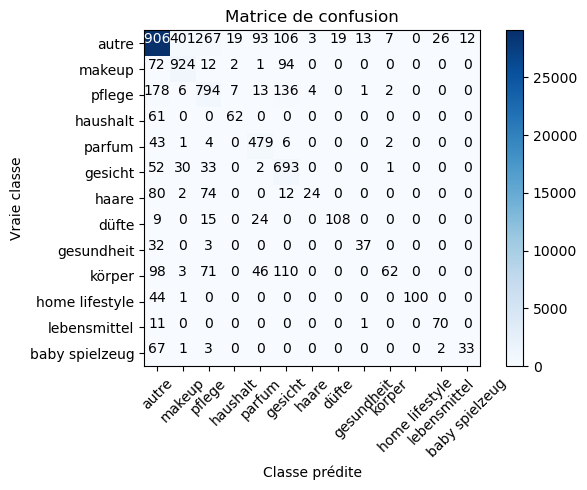

In [29]:
# Entraîner le modèle Naive Bayes en utilisant la fonction train_naive_bayes_model
nb_model, X_test_count, y_test = train_naive_bayes_model(df)
    
# Évaluer le modèle Naive Bayes et enregistrer le modèle entraîné
evaluate_and_save_model(nb_model, X_test_count, y_test, 'model_NaiveBayes.pkl')

# Obtenir les prédictions sur l'ensemble de test
y_pred = nb_model.predict(X_test_count) 

# Afficher la matrice de confusion
labels = df['category'].unique()
plot_confusion_matrix(y_test, y_pred, labels)

## Gboost 

In [14]:
import os
import joblib
import pandas as pd
import re
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

In [15]:
def train_gradient_boosting_model(df):
    df['category'] = df['category'].fillna('')
    df['description'] = df['description'].fillna('')
    X_train, X_test, y_train, y_test = train_test_split(df['description'], df['category'], test_size=0.2, random_state=42)
    
    X_train = X_train.apply(preprocess_text)
    X_test = X_test.apply(preprocess_text)
    
    count_vectorizer = CountVectorizer()
    
    X_train_count = count_vectorizer.fit_transform(X_train)
    X_test_count = count_vectorizer.transform(X_test)
    
    # Sous-échantillonnage des données pour gérer le déséquilibre des classes
    sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = sampler.fit_resample(X_train_count, y_train)
    
    # Création d'une instance de modèle Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    
    # Entraînement du modèle sur l'ensemble d'entraînement sous-échantillonné
    gb_model.fit(X_resampled, y_resampled)
    
    y_pred = gb_model.predict(X_test_count)
    
    return gb_model, X_test_count, y_test

In [16]:
def evaluate_and_save_model(gb_model, X_test_count, y_test, model_path):
    y_pred = gb_model.predict(X_test_count)

    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print("Precision:", precision)
    print("Score F1 sur l'ensemble de test:", f1)
    print("Accuracy sur l'ensemble de test:", accuracy)

    print("Rapport de classification : ")
    print(classification_report(y_test, y_pred))

    joblib.dump(gb_model, model_path)

In [17]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matrice de confusion')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.show()


Precision: 0.9331195210731434
Score F1 sur l'ensemble de test: 0.8914550669635903
Accuracy sur l'ensemble de test: 0.8661067476924841
Rapport de classification : 
                precision    recall  f1-score   support

         autre       1.00      0.89      0.94     30028
baby spielzeug       0.52      0.88      0.65       106
         düfte       0.67      0.83      0.74       156
       gesicht       0.55      0.72      0.62       811
    gesundheit       0.23      0.90      0.37        72
         haare       0.26      0.86      0.40       192
      haushalt       0.30      0.95      0.45       123
home lifestyle       0.47      0.91      0.62       145
        körper       0.13      0.63      0.22       390
  lebensmittel       0.65      1.00      0.78        82
        makeup       0.57      0.78      0.66      1105
        parfum       0.64      0.77      0.70       535
        pflege       0.64      0.48      0.55      1141

      accuracy                           0.87     3

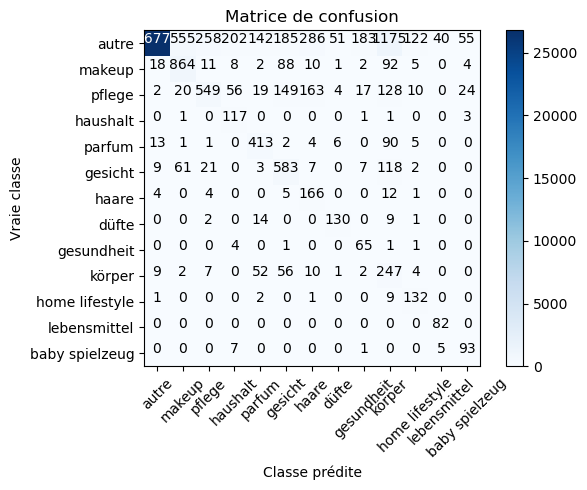

In [18]:
# Entraîner le modèle Gradient Boosting en utilisant la fonction train_gradient_boosting_model
gb_model, X_test_count, y_test = train_gradient_boosting_model(df)
    
# Évaluer le modèle Gradient Boosting et enregistrer le modèle entraîné
evaluate_and_save_model(gb_model, X_test_count, y_test, 'model_GradientBoosting.pkl')

# Obtenir les prédictions sur l'ensemble de test
y_pred = gb_model.predict(X_test_count) 

# Afficher la matrice de confusion
labels = df['category'].unique()
plot_confusion_matrix(y_test, y_pred, labels)